In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [360]:
df = pd.read_csv('dados_alunos.csv')

df_perfil = df[['ID da resposta', 'Última página',
       'Data de início', 'Nome Completo',
       'Idade', 'Ano', 'Possui irmãos?',
       'Caso a resposta anterior seja positiva, quantos irmãos?',
       'Você costuma ler livros?', 'Você costuma ler quadrinhos?',
       'Você costuma ouvir músicas?', 'Você costuma assistir filmes e séries?',
       'Prefere ler ou ver séries/filmes?', 'Qual a sua matéria preferida?',
       'Rede social preferida', 'Tipo de video preferido no YouTube',
       'Quantas horas por dia passa no celular? ',
       'Joga jogos eletrônicos? Se sim, onde?']]

df_perfil.columns = range(df_perfil.columns.size)
df_perfil.columns = ['id', 'ultima_pag', 'data', 'nome', 'idade', 'ano', 'tem_irmaos', 'quantos', 'le_livros', 'le_hqs', 'ouve_musicas', 've_filmes', 'livro_ou_serie', 'materia', 'rede_social', 'tipo_video', 'horas_cel', 'jogos']

df_perguntas = df[['ID da resposta','Não possui vacina como modo de prevenção.',
       'A vacina deve ser tomada até os 30 dias de vida.',
       'Vacina deve ser tomada até os 14 meses de vida.',
       'Não pode ser transmitida pelo sangue.',
       'A forma de contaminação mais comum é por contato direto.',
       'Comumente transmitida sexualmente.',
       'Pode ser prevenida com higiene básica.',
       'Pode ser prevenida com a análise de sangue contaminado.',
       'Pode ser prevenida com o uso de camisinhas.', 'Selecione:',
       'Uma criança de 5 anos é diagnosticada com hepatite. Os pais relatam que o filho participou de uma festa infantil em um sítio e usaram a água de uma fonte natural para fazer suco para eles. Outra informação importante é que outras 4 crianças também deram entrada no pronto socorro com os mesmos sintomas. Qual a possível forma de hepatite que essas crianças possuem? ']]

df_perguntas.columns = ['id', '1.a', '1.b', '1.c', '2.a', '2.b', '2.c', '3.a', '3.b', '3.c', '4', '5']

df_tempos = df[['ID da resposta', 'Tempo total',
       'Tempo do grupo: MINDMAT - Formulário de pesquisa para estudo científico de Inteligência Artificial da EACH-USP',
       'Tempo do grupo: Perfil',
       'Tempo do grupo: Informativo', 
       'Tempo do grupo: 1',
       'Tempo do grupo: 2',
       'Tempo do grupo: 3',
       'Tempo do grupo: 4',
       'Tempo do grupo: 5']]

df_tempos.columns = ['id', 'total', 'nome', 'perfil', 'informativo', '1', '2', '3', '4', '5']

tem_irmaos = df_perfil['tem_irmaos'].eq('Sim').mul(1)
le_livros = df_perfil['le_livros'].eq('Sim').mul(1)
le_hqs = df_perfil['le_hqs'].eq('Sim').mul(1)
ouve_musicas = df_perfil['ouve_musicas'].eq('Sim').mul(1)
ve_filmes = df_perfil['ve_filmes'].eq('Sim').mul(1)
livro_ou_serie = df_perfil['livro_ou_serie'].eq('Sim').mul(1)

df_perfil.drop(['tem_irmaos','le_livros', 'le_hqs', 'ouve_musicas', 've_filmes', 'livro_ou_serie'], axis = 1, inplace = True)
df_perfil = pd.concat([df_perfil, tem_irmaos, le_livros, le_hqs, ouve_musicas, ve_filmes, livro_ou_serie], axis = 1)

df_perfil = df_perfil[['id', 'ultima_pag', 'data', 'nome', 'idade', 'ano', 'tem_irmaos',
       'quantos', 'le_livros', 'le_hqs', 'ouve_musicas', 've_filmes',
       'livro_ou_serie', 'materia', 'rede_social', 'tipo_video', 'horas_cel',
       'jogos']]

/home/wendel/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [362]:
df_perguntas

,id,1.a,1.b,1.c,2.a,2.b,2.c,3.a,3.b,3.c,4,5
0,4,Hepatite B,Hepatite B,Hepatite B,Hepatite C,Hepatite C,Hepatite A,Hepatite A,Hepatite B,Hepatite C,A hepatite B é considerada uma infecção sexual...,Hepatite A
1,5,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,A hepatite C é uma doença transmitida pelo con...,Hepatite A
2,6,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,Hepatite A,A hepatite A possui sua transmissão por meio d...,Hepatite A
3,7,Hepatite C,Hepatite B,Hepatite A,Hepatite A,Hepatite A,Hepatite B,Hepatite A,Hepatite C,Hepatite B,A hepatite C é uma doença transmitida pelo con...,Hepatite A


In [364]:
df_tempos

,id,total,nome,perfil,informativo,1,2,3,4,5
0,4,57.37,3.56,28.91,4.98,4.31,5.12,4.20,3.12,3.17
1,5,61.04,2.97,33.59,3.76,5.01,4.43,4.77,3.97,2.54
2,6,164.61,33.12,68.79,7.22,35.29,5.73,6.07,4.70,3.69
3,7,287.07,9.49,54.18,131.17,9.93,25.31,10.65,35.35,10.99


In [365]:
df_perfil

,id,ultima_pag,data,nome,idade,ano,tem_irmaos,quantos,le_livros,le_hqs,ouve_musicas,ve_filmes,livro_ou_serie,materia,rede_social,tipo_video,horas_cel,jogos
0,4,8,2022-05-17 20:07:32,zfdbzdfbdf,12,1º Ano Ensino Médio,1,2,1,0,0,1,0,Português,Instagram,Notícias,Uma a duas horas,Videogame
1,5,8,2022-05-17 20:11:12,xvzbzbb,12,8° Ano Fundamental,1,1,1,1,1,1,0,Matemática,Twitter,React,Cinco horas ou mais,Videogame
2,6,8,2022-05-17 20:41:36,Vitor,27,3º Ano Ensino Médio,1,1,1,1,1,1,0,Matemática,Twitter,Gameplay,Três a quatro horas,PC
3,7,8,2022-05-19 16:56:59,Wendel Virgulino da Silva,27,3º Ano Ensino Médio,1,1,1,1,1,1,0,Física,Instagram,React,Cinco horas ou mais,Videogame


In [229]:
id = list(range(1, 31))

irmaos = np.random.randint(0, 2, 30)
quantos = np.random.randint(0, 5, 30)
livros = np.random.randint(0, 2, 30)
hqs = np.random.randint(0, 2, 30)
musicas = np.random.randint(0, 2, 30)
filmes = np.random.randint(0, 2, 30)
livro_serie = np.random.randint(0, 2, 30)

elementos = ['Português', 'Matemática', 'Geografia', 'História', 'Física', 'Química', 'Artes', 'Outra']
materia = [random.choice(elementos) for x in range(1, 31) ]

elementos = ['Instagram', 'Twitter', 'TikTok', 'Facebook', 'Outra']
rede_social = [random.choice(elementos) for x in range(1, 31) ]

elementos = ['React', 'Gameplay', 'Podcasts', 'Notícias', 'Musicas e shows', 'Ciências']
tipo_video = [random.choice(elementos) for x in range(1, 31) ]

elementos = ['Uma a duas horas', 'Três a quatro horas', 'Cinco horas ou mais']
horas_cel = [random.choice(elementos) for x in range(1, 31) ]

elementos = ['Videogame', 'Celular', 'PC', 'Não Jogo']
jogos = [random.choice(elementos) for x in range(1, 31) ]

In [230]:
elementos = ['8f', '9f', '1m', '2m', '3m']
ano = [random.choice(elementos) for x in range(1, 31) ]

idade = []
for a in ano:
    if a == '8f':
        idade.append(np.random.randint(12, 15))
    elif a == '9f':
        idade.append(np.random.randint(13, 16))
    elif a == '1m':
        idade.append(np.random.randint(14, 17))
    elif a == '2m':
        idade.append(np.random.randint(15, 18))
    else:
        idade.append(np.random.randint(16, 19))
    

In [222]:
df_perfil = df_perfil.drop(df.index)

In [223]:
df_perfil

,id,ultima_pag,data,nome,idade,ano,irmaos,quantos,livros,hqs,musicas,filmes,livro_serie,materia,rede_social,tipo_video,horas_cel,jogos


In [231]:
df_perfil['id'] = id
df_perfil['idade'] = idade
df_perfil['ano'] = ano
df_perfil['irmaos'] = irmaos
df_perfil['quantos'] = quantos
df_perfil['livros'] = livros
df_perfil['hqs'] = hqs
df_perfil['musicas'] = musicas
df_perfil['filmes'] = filmes
df_perfil['livro_serie'] = livro_serie
df_perfil['materia'] = materia
df_perfil['rede_social'] = rede_social
df_perfil['tipo_video'] = tipo_video
df_perfil['horas_cel'] = horas_cel
df_perfil['jogos'] = jogos

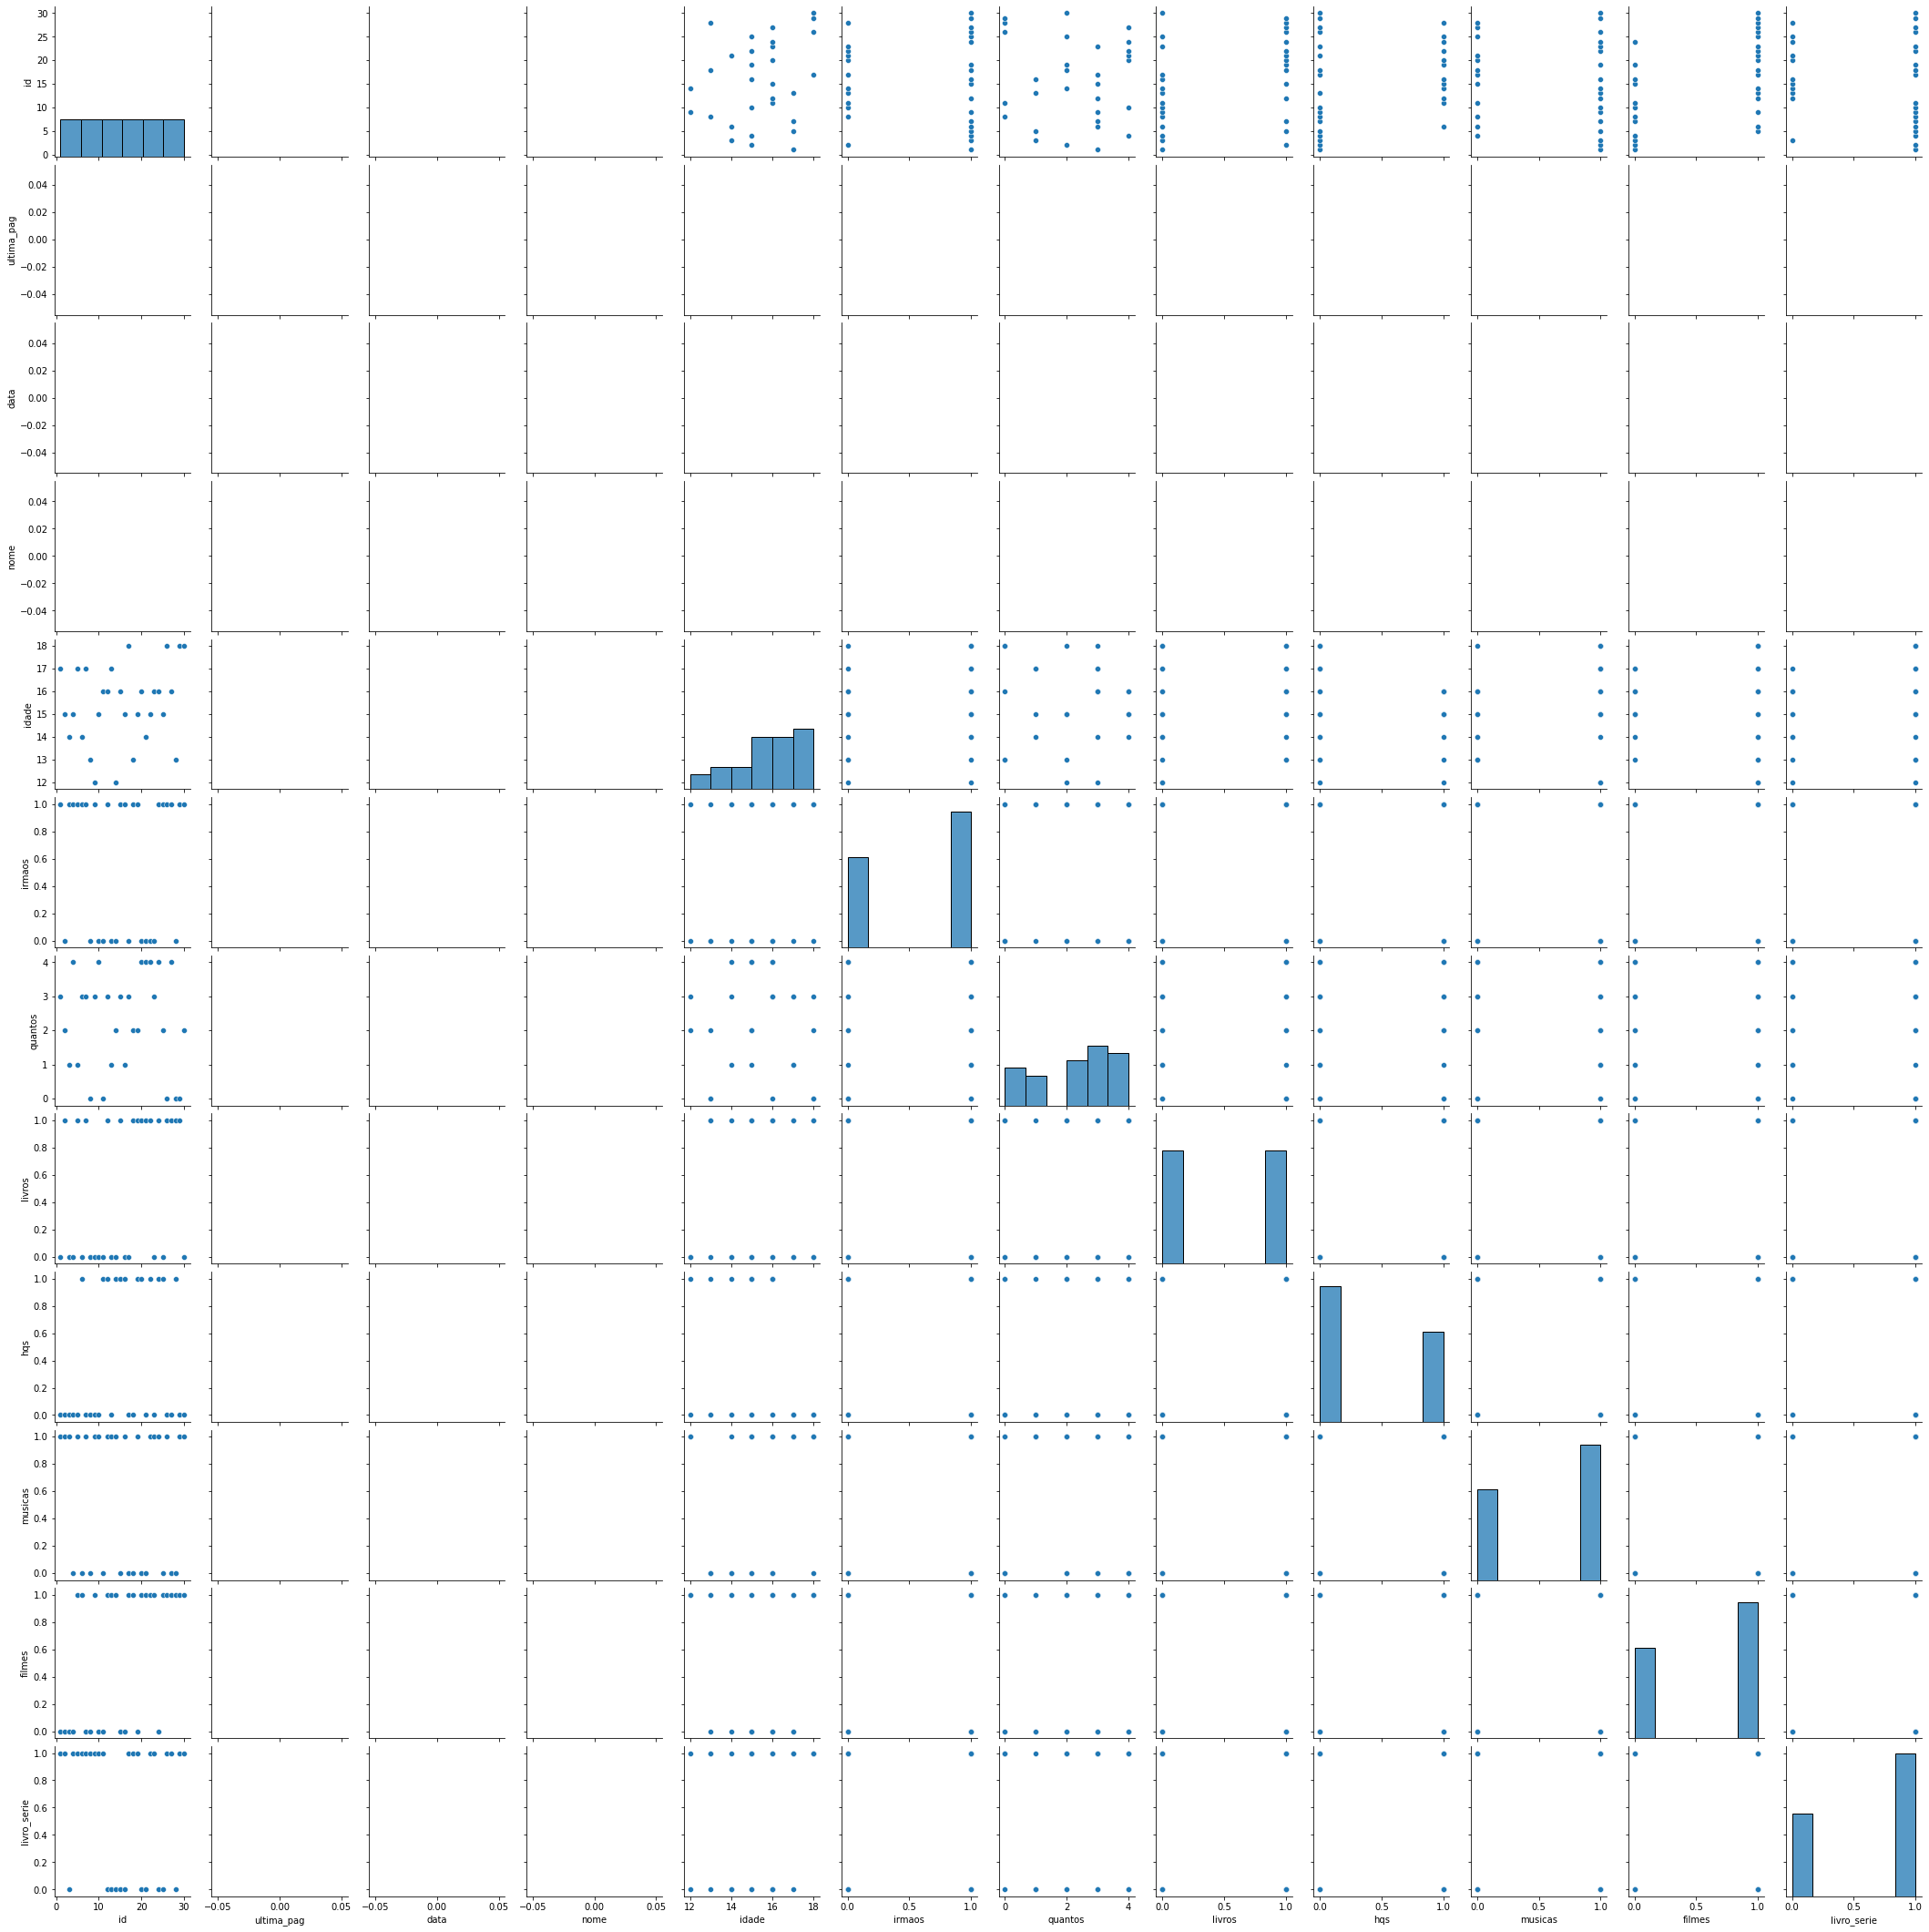

In [233]:
sns.pairplot(df_perfil)